In [35]:
# !pip install networkx

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
import pingouin as pg

# Exercise Admission Data

In [37]:
admission = pd.read_csv("admission_data.csv")
admission.head()

,student_id,gender,major,admitted
0,35377,female,Chemistry,False
1,56105,male,Physics,True
2,31441,female,Chemistry,False
3,51765,male,Physics,True
4,53714,female,Physics,True


In [38]:
pd.crosstab(admission['gender'], admission['admitted'])

admitted,False,True
gender,,
female,183,74
male,125,118


In [39]:
admission_rates = pd.crosstab(admission['gender'], admission['admitted'], normalize='index').round(3)
admission_rates

admitted,False,True
gender,,
female,0.712,0.288
male,0.514,0.486


<Axes: xlabel='gender'>

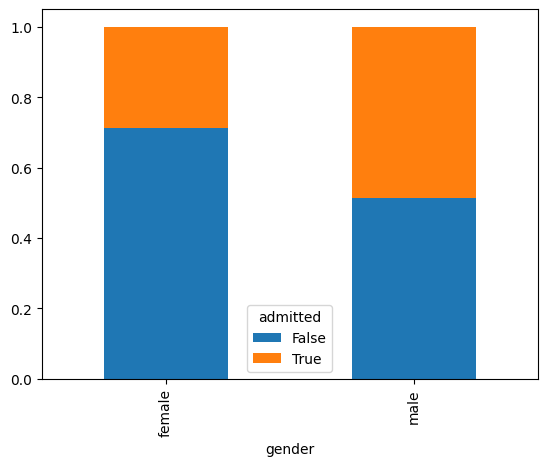

In [40]:
admission_rates.plot(kind='bar', stacked=True)

# Chi-Squared Test

The Chi-Squared Test is a statistical method used to determine if there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. It's widely used in situations where data is categorical (e.g., yes/no, red/blue, male/female).

In [41]:

expected, observed, stats = pg.chi2_independence(admission, x='gender', y='admitted')
print("Expected Values:")
print(expected)
print()
print("Observed Values:")
print(observed)
print()
print("Chi Square Statistic:")
print(stats.round(3))


Expected Values:
admitted    False   True 
gender                   
female    158.312  98.688
male      149.688  93.312

Observed Values:
admitted  False  True 
gender                
female    182.5   74.5
male      125.5  117.5

Chi Square Statistic:
                 test  lambda    chi2  dof  pval  cramer  power
0             pearson   1.000  19.802  1.0   0.0   0.199  0.994
1        cressie-read   0.667  19.827  1.0   0.0   0.199  0.994
2      log-likelihood   0.000  19.930  1.0   0.0   0.200  0.994
3       freeman-tukey  -0.500  20.057  1.0   0.0   0.200  0.994
4  mod-log-likelihood  -1.000  20.226  1.0   0.0   0.201  0.994
5              neyman  -2.000  20.700  1.0   0.0   0.203  0.995


The Pearson's chi-squared test has a p-value that is smaller than the typical threshold of 0.05. A p-value of p < 0.05 suggests that the observed data are extremely unlikely under the null hypothesis. The null hypothesis states that there is no association between the two variables.

In [42]:
admission_rates_by_major =  pd.crosstab(index=[admission['gender'], admission['major']], columns=admission['admitted'], normalize='index').round(3)
admission_rates_by_major

admitted          False  True 
gender major                  
female Chemistry  0.774  0.226
       Physics    0.258  0.742
male   Chemistry  0.889  0.111
       Physics    0.484  0.516

<Axes: xlabel='gender,major'>

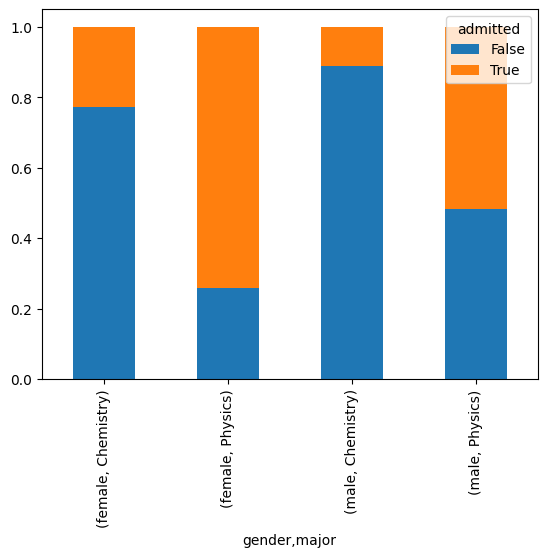

In [43]:
admission_rates_by_major.plot(kind='bar', stacked=True)

# Simpson's Paradox

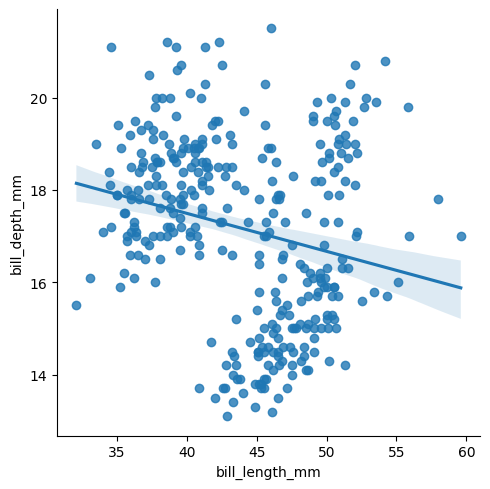

In [44]:

penguins = sns.load_dataset("penguins").dropna(axis=0)
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

In [45]:

pg.corr(x=penguins["bill_length_mm"], y=penguins["bill_depth_mm"])

,n,r,CI95%,p-val,BF10,power
pearson,333,-0.228626,"[-0.33, -0.12]",0.000025,470.08,0.988511


## Conditioning on Species

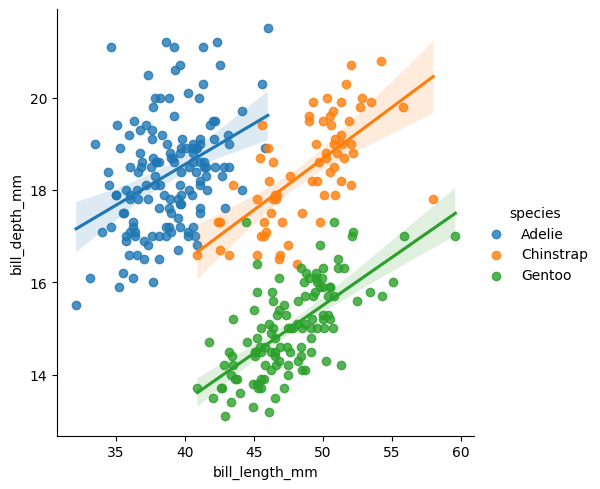

In [46]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [47]:
penguins["species_int"] = penguins["species"].map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
pg.partial_corr(data=penguins, x="bill_length_mm", y="bill_depth_mm", covar="species_int")

,n,r,CI95%,p-val
pearson,333,0.68019,"[0.62, 0.73]",1.993379e-46


# Causal Graphs

In [48]:
options = {
    "node_color": "white",
    "edgecolors": "white",
}

## Mediating Variable (Mediator)

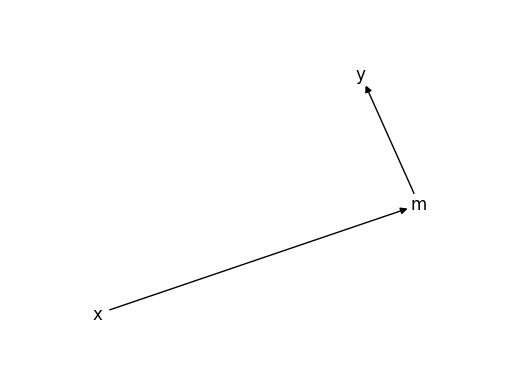

Is x and y d-connected?
True


In [49]:
G = nx.DiGraph([
    ("x", "m"),
    ("m", "y"),
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is x and y d-connected?")
print(not nx.d_separated(G, {"x"}, {"y"}, {}))

## Confounding Variable (Common Cause)

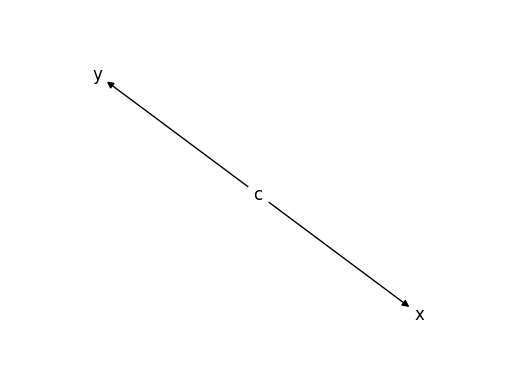

Is x and y d-connected?
True


In [50]:
G = nx.DiGraph([
    ("c", "x"),
    ("c", "y"),
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is x and y d-connected?")
print(not nx.d_separated(G, {"x"}, {"y"}, {}))

## Collider Variable (Common Effect)

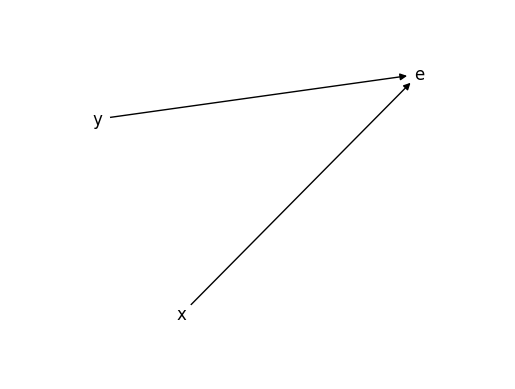

Is x and y d-connected?
False


In [51]:
G = nx.DiGraph([
    ("x", "e"),
    ("y", "e"),
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is x and y d-connected?")
print(not nx.d_separated(G, {"x"}, {"y"}, {}))

## Why are Chocolate Consumption and Nobel Prizes correlated?

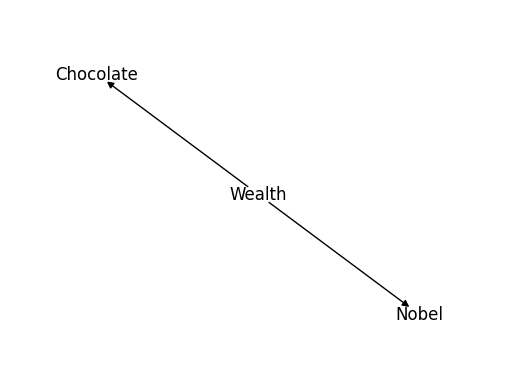

Is Chocolate Consumption and Nobel Prizes d-connected?
True


In [52]:
G = nx.DiGraph([
    ("Wealth", "Chocolate"),
    ("Wealth", "Nobel"),
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is Chocolate Consumption and Nobel Prizes d-connected?")
print(not nx.d_separated(G, {"Chocolate"}, {"Nobel"}, {}))

## Do Storks bring the Babies?

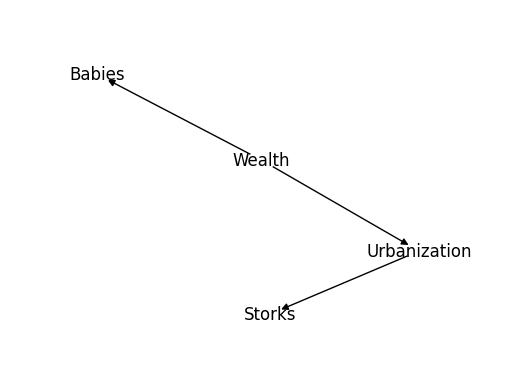

Are Babies and Storks d-connected?
True


In [53]:
G = nx.DiGraph([
    ("Wealth", "Babies"),
    ("Wealth", "Urbanization"),
    ("Urbanization", "Storks")
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Are Babies and Storks d-connected?")
print(not nx.d_separated(G, {"Babies"}, {"Storks"}, {}))

# D-Separation

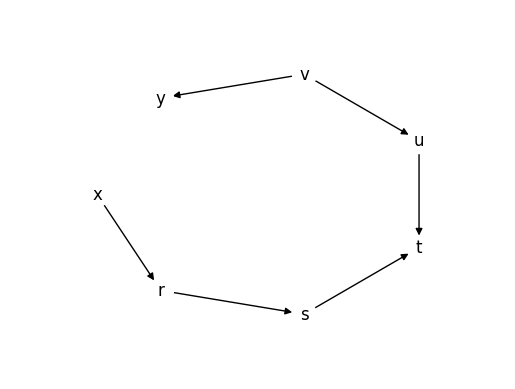

Is x and y d-connected?
False
Is x and s d-connected, conditional on set {r, v}?
False
Is s and t d-connected, conditioned on set {r, v}?
True
Is s and u d-connected, conditioned on set {r, v}?
False


In [54]:
G = nx.DiGraph([
    ("x", "r"),
    ("r", "s"),
    ("s", "t"),
    ("u", "t"),
    ("v", "u"),
    ("v", "y")
])

pos = nx.shell_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is x and y d-connected?")
print(not nx.d_separated(G, {"x"}, {"y"}, {}))
print("Is x and s d-connected, conditional on set {r, v}?")
print(not nx.d_separated(G, {"x"}, {"s"}, {"r", "v"}))
print("Is s and t d-connected, conditioned on set {r, v}?")
print(not nx.d_separated(G, {"s"}, {"t"}, {"r", "v"}))
print("Is s and u d-connected, conditioned on set {r, v}?")
print(not nx.d_separated(G, {"s"}, {"u"}, {"r", "v"}))

## Smoking and Lung Cancer

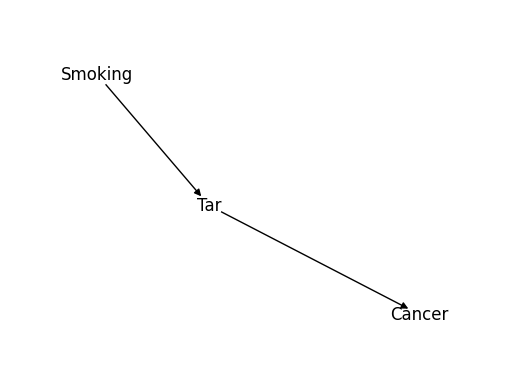

Is Smoking and Cancer d-connected?
True
Is Smoking and Cancer d-connected, conditional on Tar?
False


In [55]:
G = nx.DiGraph([
    ("Smoking", "Tar"),
    ("Tar", "Cancer"),
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is Smoking and Cancer d-connected?")
print(not nx.d_separated(G, {"Smoking"}, {"Cancer"}, {}))
print("Is Smoking and Cancer d-connected, conditional on Tar?")
print(not nx.d_separated(G, {"Smoking"}, {"Cancer"}, {"Tar"}))

# Conditioning

In [56]:
df = pg.read_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Correlation

Correlation is a statistical measure that describes the extent to which two variables change together. It provides an indication of whether an increase or decrease in one variable tends to be associated with an increase or decrease in another variable.

$$
\rho(total\_bill, tip)
$$

$$
= \frac{cov(total\_bill, tip)}{\sigma_{total\_bill} \cdot \sigma_{tip}}
$$

In [57]:
pg.corr(x=df['total_bill'], y=df['tip'])

,n,r,CI95%,p-val,BF10,power
pearson,244,0.675734,"[0.6, 0.74]",6.692471e-34,4.952e+30,1.0


### Partial Correlation

Partial correlation is a statistical measure that describes the strength and direction of a relationship between two variables while controlling for the effect of one or more additional variables.

$$
\rho_{total\_bill, tip \cdot size}
$$

$$
= \frac{\rho_{total\_bill, tip} - \rho_{total\_bill, size} \cdot \rho_{tip, size}}{\sqrt{1 - \rho_{total\_bill, size}^2} \cdot \sqrt{1 - \rho_{tip, size}^2}}
$$


In [58]:
pg.partial_corr(data=df, x='total_bill', y='tip', covar=["size"])

,n,r,CI95%,p-val
pearson,244,0.548059,"[0.45, 0.63]",1.880917e-20


### Linear Regression

Consider a linear regression model with `tip` as the dependent variable and `total_bill` as the independent variable:

$$ tip = \beta_0 + \beta_1 \cdot total\_bill + \epsilon $$

In [59]:
lm = pg.linear_regression(df['total_bill'], df['tip'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.92,0.16,5.76,0.0,0.46,0.45,0.61,1.23
1,total_bill,0.11,0.01,14.26,0.0,0.46,0.45,0.09,0.12


### Multiple Linear Regression

Consider a linear regression model with `tip`  as the dependent variable and `total_bill` and size as the independent variables

$$ tip = \beta_0 + \beta_1 \cdot total\_bill + \beta_2 \cdot size + \epsilon $$

In [60]:
lm = pg.linear_regression(df[['total_bill', 'size']], df['tip'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.67,0.19,3.46,0.00,0.47,0.46,0.29,1.05
1,total_bill,0.09,0.01,10.17,0.00,0.47,0.46,0.07,0.11
2,size,0.19,0.09,2.26,0.02,0.47,0.46,0.02,0.36


# Berkson's Paradox

Alice: „Why are all handsome men who I date such jerks?“

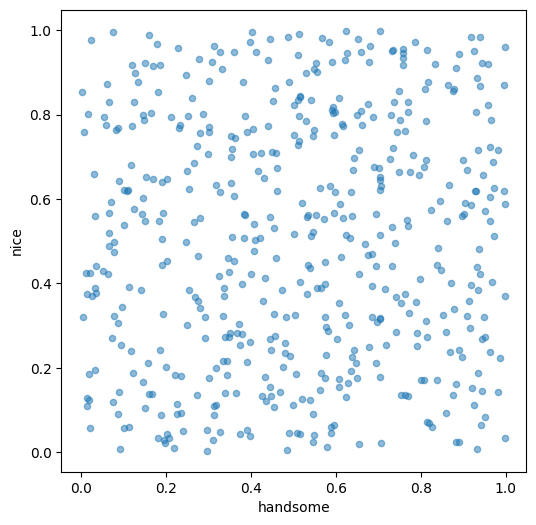

In [61]:

import pandas as pd
import numpy as np
data = {
    "nice": np.random.uniform(0, 1, 500),
    "handsome": np.random.uniform(0, 1, 500)
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 6))
df.plot.scatter(x="handsome", y="nice", ax=ax, alpha=0.5)
plt.show()



In [62]:
from scipy.stats import pearsonr
r, p = pearsonr(df["nice"], df["handsome"])
print("Correlation coefficient:", r)
print("p-value:", p)


Correlation coefficient: 0.05927133231493745
p-value: 0.1857710011600312


Alice wants to date nice and handsome guys.

In [63]:
selected_data = df[(df["nice"] > 0.5) | (df["handsome"] > 0.5)]

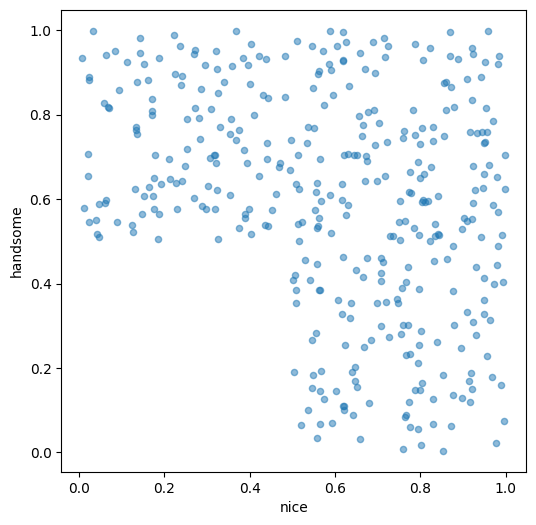

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
selected_data.plot.scatter(x="nice", y="handsome", ax=ax, alpha=0.5)
plt.show()

In [65]:
from scipy.stats import pearsonr
r, p = pearsonr(selected_data["nice"], selected_data["handsome"])
print("Correlation coefficient:", r)
print("p-value:", p)

Correlation coefficient: -0.3183136791124315
p-value: 2.978442745316955e-10


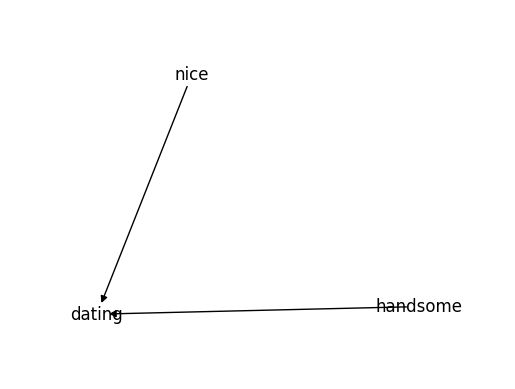

Is nice and handsome d-connected?
False
Is nice and handsome d-connected conditioned on dating?
True


In [66]:
G = nx.DiGraph([
    ("nice", "dating"),
    ("handsome", "dating"),
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is nice and handsome d-connected?")
print(not nx.d_separated(G, {"nice"}, {"handsome"}, {}))
print("Is nice and handsome d-connected conditioned on dating?")
print(not nx.d_separated(G, {"nice"}, {"handsome"}, {"dating"}))


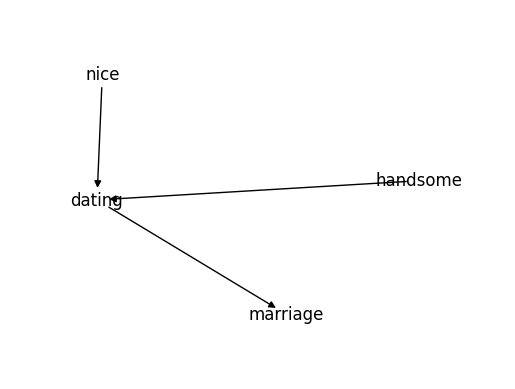

Is nice and handsome d-connected conditioned on marriage?
True


In [67]:
G = nx.DiGraph([
    ("nice", "dating"),
    ("handsome", "dating"),
    ("dating", "marriage"),
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

print("Is nice and handsome d-connected conditioned on marriage?")
print(not nx.d_separated(G, {"nice"}, {"handsome"}, {"marriage"}))


# Complex Graph

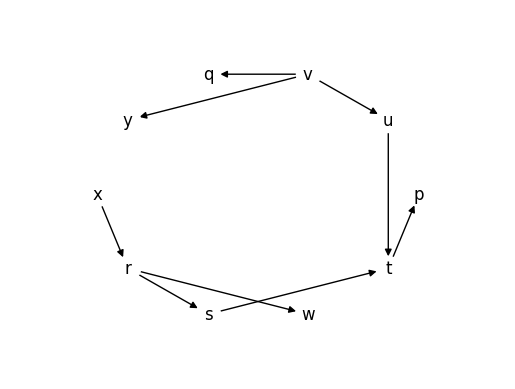

Is x and s d-connected, conditional on {r, v}?
False


In [68]:
G = nx.DiGraph([
    ("x", "r"),
    ("r", "s"),
    ("r", "w"),
    ("s", "t"),
    ("t", "p"),
    ("u", "t"),
    ("v", "u"),
    ("v", "q"),
    ("v", "y")
])

pos = nx.shell_layout(G)
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print("Is x and s d-connected, conditional on {r, v}?")
print(not nx.d_separated(G, {"x"}, {"s"}, {"r", "v"}))